# Predicting Housing Prices

**by Andrew Buensalida**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

In this project, I create 4 different regression models to predict housing prices



[Back to top](#Index)


## 1. Introduction

- First I import data of house sale price and characteristics such as lot area, number of bedrooms, etc. from a csv file. 
- Second visualize the data to better understand it.
- Third I get 20 records from the housing data. I get only numerical columns, then create a correlation matrix. I get the 2 columns that have the highest correlation to sale price. I use these columns to create a linear regression model. The score for this model is 0.75, meaning given the 2 variables, the model can explains 75% of the sale price. 
- Fourth, continuing with the previous model, I increase the number of records to 100, remove the columns that contain nulls, and increase the columns to 5. The score for the second model increased to 0.83.
- Fifth, I tested the second model against data from jtest.csv. Against this data, the score is only 0.74.
- Sixth, I removed columns that don't make sense, like categorical data such as month of sale and MSSubClass, an unnamed column, and the Id column. The score for this third model did not change from the second model.
- Seventh, I increased the number of columns to be included in the model to 10. This increased the score to 0.85. I then tested it against jtest.csv and got a score of 0.75.


[Back to top](#Index)

## 2. The Data

Here I use the pandas library to create dataframes, which are basically tables. I use numpy to get a number data type. I use matplotlib to create scatter plots and histograms.

[Back to top](#Index)

### 2.1 Import the Data

In [2165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# As for the data, it is downloaded from the MIT emeritus website. The data has 100 records of house sales, and 82 columns such as LotArea, Number of Bathrooms, etc.
df = pd.read_csv('houseSmallData/houseSmallData.csv')
print(df.shape)

# For the first model, I use only 20 records.
train = df.iloc[0:20,:]
print(train.head())

(100, 82)
   Unnamed: 0  Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0           0   1          60       RL         65.0     8450   Pave   NaN   
1           1   2          20       RL         80.0     9600   Pave   NaN   
2           2   3          60       RL         68.0    11250   Pave   NaN   
3           3   4          70       RL         60.0     9550   Pave   NaN   
4           4   5          60       RL         84.0    14260   Pave   NaN   

  LotShape LandContour  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0      Reg         Lvl  ...        0    NaN   NaN         NaN       0      2   
1      Reg         Lvl  ...        0    NaN   NaN         NaN       0      5   
2      IR1         Lvl  ...        0    NaN   NaN         NaN       0      9   
3      IR1         Lvl  ...        0    NaN   NaN         NaN       0      2   
4      IR1         Lvl  ...        0    NaN   NaN         NaN       0     12   

  YrSold SaleType  SaleCondition  SalePrice  


[Back to top](#Index)

### 2.2 Data Exploration



In [2166]:
# Investigate Sale Price to make sure there are no missing values.
train['SalePrice']

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

(array([1., 6., 5., 1., 2., 1., 1., 1., 1., 1.]),
 array([ 90000., 115500., 141000., 166500., 192000., 217500., 243000.,
        268500., 294000., 319500., 345000.]),
 <BarContainer object of 10 artists>)

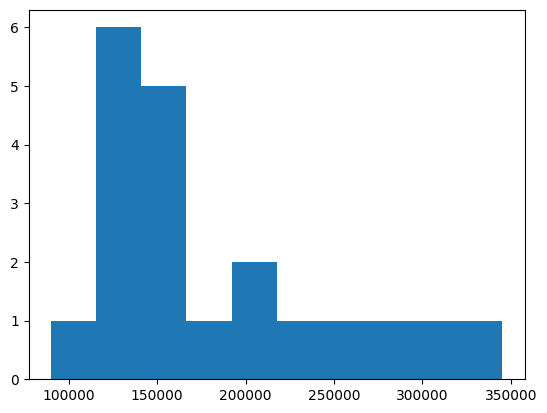

In [2167]:
# plot histogram of Sale Price
plt.hist(train['SalePrice'])

In [2168]:
# select only numeric columns
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(20, 40)

In [2169]:
# calculate correlation matrix
corr = numeric.corr()

In [2170]:
# What are the top 3 columns correlated with Sale Price?

cols = corr['SalePrice'].sort_values(ascending=False)[0:3].index
corr["SalePrice"].sort_values(ascending=False)[:]

SalePrice        1.000000
OverallQual      0.807380
MasVnrArea       0.788274
FullBath         0.721954
TotRmsAbvGrd     0.699634
YearBuilt        0.699627
YearRemodAdd     0.698731
GarageArea       0.696998
BedroomAbvGr     0.681291
GrLivArea        0.676909
TotalBsmtSF      0.651318
GarageYrBlt      0.649557
LotFrontage      0.606910
WoodDeckSF       0.575730
GarageCars       0.571377
1stFlrSF         0.449307
2ndFlrSF         0.419880
BsmtFinSF1       0.400864
Fireplaces       0.374814
MoSold           0.328774
LotArea          0.265787
BsmtFullBath     0.222720
BsmtUnfSF        0.174284
OpenPorchSF      0.131968
HalfBath         0.113692
BsmtFinSF2       0.064627
BsmtHalfBath     0.000794
ScreenPorch     -0.128599
3SsnPorch       -0.132049
EnclosedPorch   -0.182838
MSSubClass      -0.199414
OverallCond     -0.260414
YrSold          -0.262237
MiscVal         -0.283727
Id              -0.298403
Unnamed: 0      -0.298403
KitchenAbvGr    -0.433657
LowQualFinSF          NaN
PoolArea    

In [2171]:
# Pick out the x and y columns
X = train[cols[1:]]
Y = train['SalePrice']


In [2172]:
# build regression model

from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

print(
    f"R^2 is : {model.score(X,Y)}"
)  # mean accuracy score of the model. R^2. How much of the sales price is explained by the 2 independent variables OverallQual and MasVnrArea

R^2 is : 0.7501993255220817


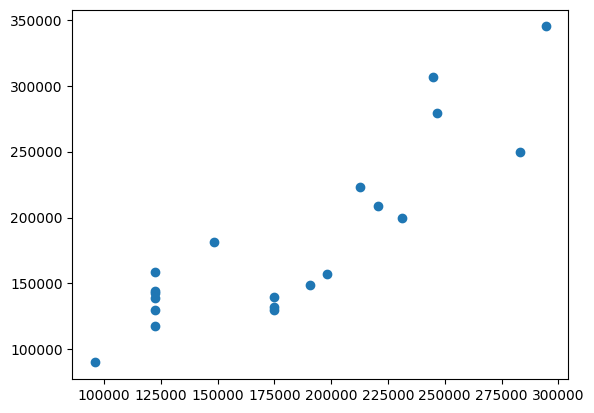

In [2173]:
# Scatter plot of the predictions against the actual values Y. It should be a straight line with a slope of 1
plt.scatter(predictions, Y)

[Back to top](#Index)

### 2.3 Data Preparation

Now we improve the model by adding more data, dropping nulls, and considering more columns, 5 instead of 2.


#### Improving the model

In [2174]:
train_100 = df.iloc[0:100, :] # select more data, from 20 to 100 records
print(train_100.head())

   Unnamed: 0  Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0           0   1          60       RL         65.0     8450   Pave   NaN   
1           1   2          20       RL         80.0     9600   Pave   NaN   
2           2   3          60       RL         68.0    11250   Pave   NaN   
3           3   4          70       RL         60.0     9550   Pave   NaN   
4           4   5          60       RL         84.0    14260   Pave   NaN   

  LotShape LandContour  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0      Reg         Lvl  ...        0    NaN   NaN         NaN       0      2   
1      Reg         Lvl  ...        0    NaN   NaN         NaN       0      5   
2      IR1         Lvl  ...        0    NaN   NaN         NaN       0      9   
3      IR1         Lvl  ...        0    NaN   NaN         NaN       0      2   
4      IR1         Lvl  ...        0    NaN   NaN         NaN       0     12   

  YrSold SaleType  SaleCondition  SalePrice  
0   2008  

In [2175]:
# The mean and standard deviation is different between taking 20 records vs taking 100 records
salePrice = train_100["SalePrice"]
salePrice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

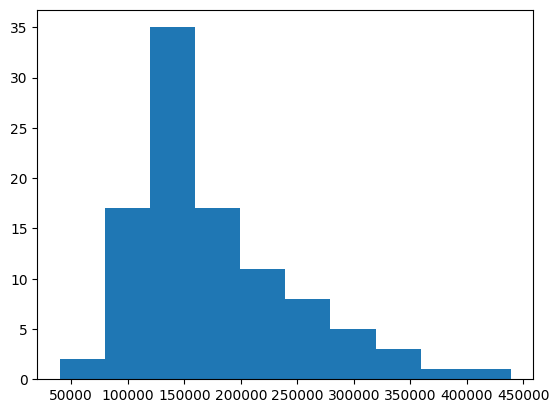

In [2176]:
plt.hist(salePrice) # it is skewed to the left which looks like a log normal distribution

(array([ 1.,  0.,  3.,  7., 21., 26., 18., 13.,  9.,  2.]),
 array([10.59663473, 10.8361466 , 11.07565847, 11.31517034, 11.55468221,
        11.79419408, 12.03370595, 12.27321782, 12.51272969, 12.75224156,
        12.99175343]),
 <BarContainer object of 10 artists>)

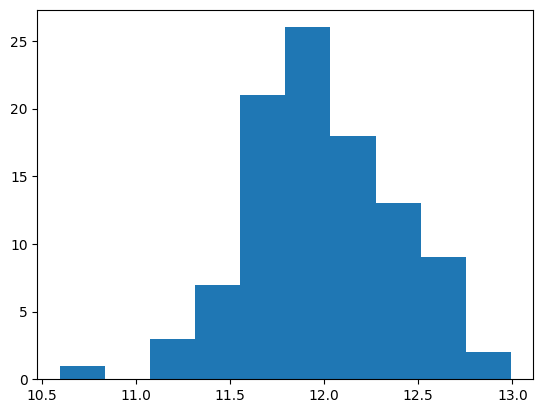

In [2177]:
plt.hist(np.log(salePrice)) # Getting the logarithm makes the distribution more normal

In [2178]:
salePrice.skew() # skewness of the original data

1.1783462304851948

In [2179]:
target = np.log(salePrice)
np.log(salePrice).skew() # skewness of the log transformed data. It is closer to 0

-0.09632240207755555

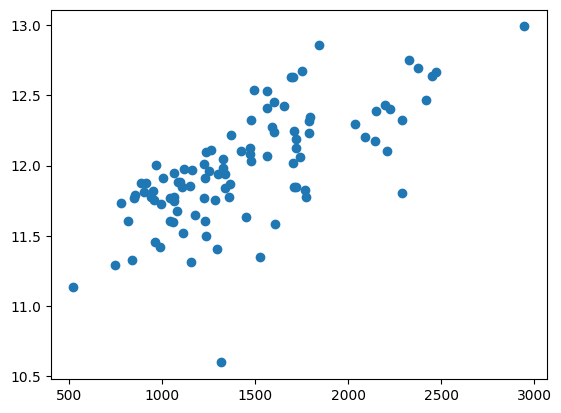

In [2180]:
plt.scatter(
    train_100["GrLivArea"], target
)  # scatter plot of GrLivArea against the target. Since it looks like the slope is 1, it might be a good predictor

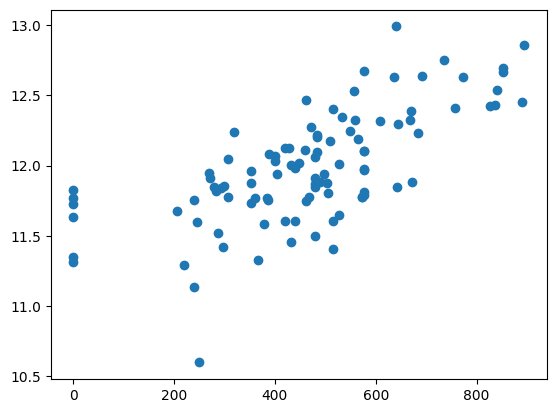

In [2181]:
plt.scatter(
    train_100["GarageArea"], target
)  # scatter plot of GarageArea against the target. It also looks like it is a good predictor

In [2182]:
# find the count of nulls in each column
nulls = pd.DataFrame(train_100.isnull().sum().sort_values(ascending=False))
nulls
# Since PoolQC, MiscFeature, Alley, Fence, FireplaceQu have a lot of nulls, we can drop them

,0
PoolQC,100
Alley,94
MiscFeature,91
Fence,77
MasVnrType,60
...,...
MasVnrArea,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


In [2183]:
# remove the columns with 1 or more nulls
numeric_dropna = train_100.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
numeric_dropna

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,42,0,0,0,0,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,35,272,0,0,0,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,60,73.5,9765,6,8,1993,1993,68.0,...,232,63,0,0,0,0,480,4,2009,185000
96,96,97,20,78.0,10264,7,5,1999,1999,183.0,...,158,29,0,0,0,0,0,8,2006,214000
97,97,98,20,73.0,10921,4,5,1965,1965,48.0,...,120,0,0,0,0,0,0,5,2007,94750
98,98,99,30,85.0,10625,5,5,1920,1950,0.0,...,0,0,77,0,0,0,400,5,2010,83000


[Back to top](#Index)

### 2.4 Correlation

The top 5 attributes of a house that predict sale price are:
- OverallQual      0.855061
- GrLivArea        0.735129
- GarageArea       0.688249
- GarageCars       0.663441
- YearBuilt        0.658636

Knowing this, we can include these 5 columns when we create the regression. We can get these top 5 columns with the code below. We use the corr() method of panda DataFrames.

In [2184]:
# Find correlation matrix
corr_dropna = numeric_dropna.corr()
# Find the top 5 columns correlated with Sale Price, instead of just 2 columns like in the first model.
cols_dropna = (
    corr_dropna["SalePrice"].sort_values(ascending=False)[0:6].index
)  # These 5 columns have above 0.6 correlation with Sale Price. It's 6 because SalePrice is still included.
corr_dropna["SalePrice"].sort_values(ascending=False)[:]

SalePrice        1.000000
OverallQual      0.855061
GrLivArea        0.735129
GarageArea       0.688249
GarageCars       0.663441
YearBuilt        0.658636
TotalBsmtSF      0.616297
GarageYrBlt      0.589361
FullBath         0.579505
MasVnrArea       0.571836
TotRmsAbvGrd     0.553603
1stFlrSF         0.550912
YearRemodAdd     0.548330
LotArea          0.497124
Fireplaces       0.487907
WoodDeckSF       0.451241
2ndFlrSF         0.381076
BsmtUnfSF        0.327020
HalfBath         0.319304
OpenPorchSF      0.301960
LotFrontage      0.277853
BsmtFinSF1       0.266713
MoSold           0.256863
BedroomAbvGr     0.233426
BsmtFullBath     0.155689
ScreenPorch      0.035930
3SsnPorch       -0.019391
BsmtHalfBath    -0.055100
MSSubClass      -0.066819
MiscVal         -0.134707
BsmtFinSF2      -0.138126
LowQualFinSF    -0.150027
Id              -0.162735
Unnamed: 0      -0.162735
OverallCond     -0.170443
EnclosedPorch   -0.233483
KitchenAbvGr    -0.235659
YrSold          -0.262683
PoolArea    


[Back to top](#Index)

## 3. Project Description

As seen above, I have dropped null columns, added more records, and added more columns. Using this I will build a new model. After that, I will build a model with categorical columns dropped, then after that I will build another model with 10 columns factored in.

[Back to top](#Index)

### 3.1 Linear Regression

As seen in the first model, the code used to create the linear regression is

```python
  lr = linear_model.LinearRegression()
  model = lr.fit(X, Y)
```

Then to predict Y given X,
```python
  predictions = model.predict(X)
```

Then to score the model
```python
  print(f"R^2 is : {model.score(X,Y)}")
```

The formula for multiple regression is:

Y = β0 + β1*X1 + β2*X2 + ... + βn*Xn + ε

Where:
- Y is the dependent variable (the variable you want to predict)
- X1, X2, ..., Xn are the independent variables (the variables used to predict Y)
- β0 is the intercept (the value of Y when all independent variables are zero)
- β1, β2, ..., βn are the regression coefficients (the estimated effect of each independent variable on Y)
- ε is the error term (the difference between the predicted and actual values of Y)

The goal of multiple regression is to estimate the values of the regression coefficients (β0, β1, β2, ..., βn) that minimize the sum of squared errors (SSE) between the predicted and actual values of Y. This is typically done using statistical techniques such as ordinary least squares (OLS) regression.

Once the regression coefficients are estimated, you can use the formula to predict the value of Y for new observations by plugging in the values of the independent variables.

[Back to top](#Index)

### 3.2 Analysis 
Continuing building a second model


In [2185]:
# Select x and y values from the table
cols_dropna = cols_dropna.drop("SalePrice")
X = numeric_dropna[cols_dropna]
Y = numeric_dropna["SalePrice"]
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt
0,7,1710,548,2,2003
1,6,1262,460,2,1976
2,7,1786,608,2,2001
3,7,1717,642,3,1915
4,8,2198,836,3,2000
...,...,...,...,...,...
95,6,1470,420,2,1993
96,7,1588,472,2,1999
97,4,960,432,1,1965
98,5,835,366,1,1920


#### Build the 2nd regression model
Again, I dropped the columns with nulls, used 5 columns instead of 2, and used 100 records instead of 20

In [2186]:
lr = linear_model.LinearRegression()
model_dropna = lr.fit(X, Y)
predictions_dropna = model_dropna.predict(X)
print(
    f"R^2 is : {model_dropna.score(X,Y)}"
)  # 0.83 from 0.75, meaning 83% of the price is explained by the 6 independent variables

R^2 is : 0.8309859964337732


(array([ 2.,  4., 19., 26., 26., 13.,  6.,  2.,  0.,  2.]),
 array([-72416.69551558, -54597.83016337, -36778.96481115, -18960.09945894,
         -1141.23410673,  16677.63124549,  34496.4965977 ,  52315.36194991,
         70134.22730213,  87953.09265434, 105771.95800655]),
 <BarContainer object of 10 artists>)

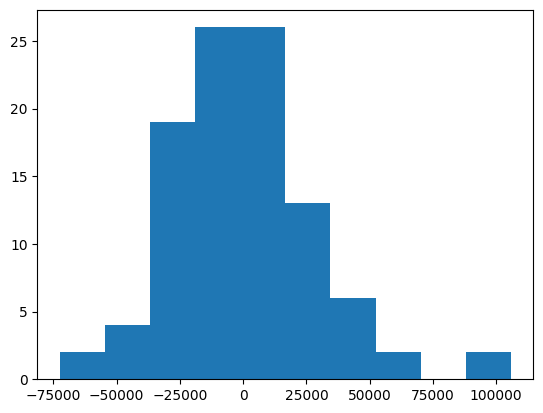

In [2187]:
plt.hist(
    Y - predictions_dropna
)  # plot the difference between the actual and predicted values. It should be normally distributed

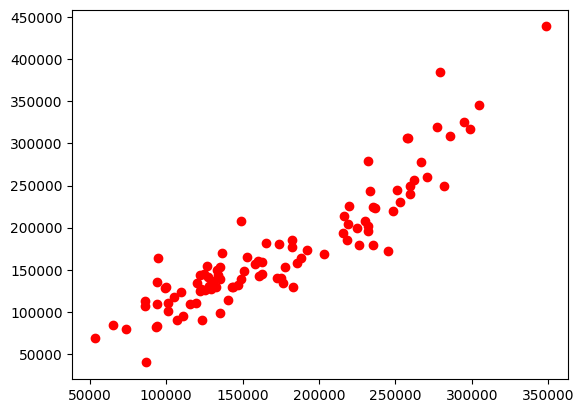

In [2188]:
plt.scatter(
    predictions_dropna, Y, color="r"
)  # scatter plot of the predictions against the actual values. It should be a straight line with a slope of 1

#### Testing model 2 against jtest data
I also add the predicted SalePrice to the jtest table

In [2189]:
# Test the model against data we have not seen before
test = pd.read_csv('jtest/jtest.csv')
X = test[cols_dropna]
Y = test['SalePrice']
predictions = model_dropna.predict(X)
X_with_predictions = X.copy()
X_with_predictions["SalePrice"] = predictions
X_with_predictions = X_with_predictions.sort_values(by="SalePrice", ascending=False)
X_with_predictions["SalePrice"] = X_with_predictions["SalePrice"].map("${:,.0f}".format)
X_with_predictions

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,SalePrice
78,9,2234,1166,3,2008,"$333,920"
85,10,3608,840,3,1892,"$324,795"
61,9,2668,726,3,2003,"$318,888"
12,7,2696,792,3,2007,"$285,349"
18,7,3222,594,3,1990,"$285,080"
...,...,...,...,...,...,...
40,4,864,0,0,1971,"$89,533"
46,5,875,180,1,1931,"$89,004"
27,5,840,0,0,1930,"$84,554"
63,4,882,0,0,1956,"$81,258"


In [2190]:
# see how good the model is with the test data
print(
    f"R^2 is : {model_dropna.score(X,Y)}"
)  # 0.74 meaning 74% of the test data sales price can be explained by the 6 independent variables

R^2 is : 0.7403341313192588


#### Improving the model a second time
by removing columns that make no sense

In [2191]:
# remove columns that make no sense, like categorical
numeric_less_col = numeric_dropna.drop(
    ["MSSubClass", "MoSold", "Id", "Unnamed: 0"], axis=1
)

# Note: Some columns in data_description.txt, like Bedroom and Kitchen, are not found in the training data.

corr = numeric_less_col.corr()
cols = (
    corr["SalePrice"].sort_values(ascending=False)[0:6].index
)  # These have above 0.6 correlation with Sale Price
cols
corr["SalePrice"].sort_values(ascending=False)[:] # Interestingly this did not change from the 2nd model


SalePrice        1.000000
OverallQual      0.855061
GrLivArea        0.735129
GarageArea       0.688249
GarageCars       0.663441
YearBuilt        0.658636
TotalBsmtSF      0.616297
GarageYrBlt      0.589361
FullBath         0.579505
MasVnrArea       0.571836
TotRmsAbvGrd     0.553603
1stFlrSF         0.550912
YearRemodAdd     0.548330
LotArea          0.497124
Fireplaces       0.487907
WoodDeckSF       0.451241
2ndFlrSF         0.381076
BsmtUnfSF        0.327020
HalfBath         0.319304
OpenPorchSF      0.301960
LotFrontage      0.277853
BsmtFinSF1       0.266713
BedroomAbvGr     0.233426
BsmtFullBath     0.155689
ScreenPorch      0.035930
3SsnPorch       -0.019391
BsmtHalfBath    -0.055100
MiscVal         -0.134707
BsmtFinSF2      -0.138126
LowQualFinSF    -0.150027
OverallCond     -0.170443
EnclosedPorch   -0.233483
KitchenAbvGr    -0.235659
YrSold          -0.262683
PoolArea              NaN
Name: SalePrice, dtype: float64

In [2192]:
# select x and y values
cols = cols.drop("SalePrice")
X = numeric_less_col[cols]
Y = numeric_less_col["SalePrice"]
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt
0,7,1710,548,2,2003
1,6,1262,460,2,1976
2,7,1786,608,2,2001
3,7,1717,642,3,1915
4,8,2198,836,3,2000
...,...,...,...,...,...
95,6,1470,420,2,1993
96,7,1588,472,2,1999
97,4,960,432,1,1965
98,5,835,366,1,1920


#### Build the 3rd regression model
like the 2nd model but less non-sense columns

In [2193]:
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
print(
    f"R^2 is : {model.score(X,Y)}"
)  # Interestingly did not change from the 2nd model
# I did not test this model since it's the same as the 2nd model

R^2 is : 0.8309859964337732


#### Improve the model a third time (model 4)
by increasing the number of columns from 5 to 10

In [2194]:
cols = (
    corr["SalePrice"].sort_values(ascending=False)[0:11].index
)  # These have above 0.6 correlation with Sale Price
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd'],
      dtype='object')

In [2195]:
# define x and y columns
cols = cols.drop("SalePrice")
X = numeric_less_col[cols]
Y = numeric_less_col["SalePrice"]


[Back to top](#Index)

### 3.3 Results

Using the top 10 correlated columns, 100 training records, and no null columns produced a score of 0.85, meaning given these 10 variables, the model can predict 85% of the sale price. Since the scatter plot of prediction vs actual looks like it has a slope of 1, the model is a good predictor. The histogram of the difference between actual sales prices and predictions has a normal distribution.


In [2196]:
lr = linear_model.LinearRegression()
model_4 = lr.fit(X, Y)
predictions = model_4.predict(X)
print(
    f"R^2 is : {model_4.score(X,Y)}"
)

R^2 is : 0.8517354506353325


(array([ 2.,  4.,  7., 22., 29., 18.,  9.,  5.,  2.,  2.]),
 array([-74711.30459464, -58456.46643905, -42201.62828345, -25946.79012786,
         -9691.95197227,   6562.88618333,  22817.72433892,  39072.56249451,
         55327.40065011,  71582.2388057 ,  87837.07696129]),
 <BarContainer object of 10 artists>)

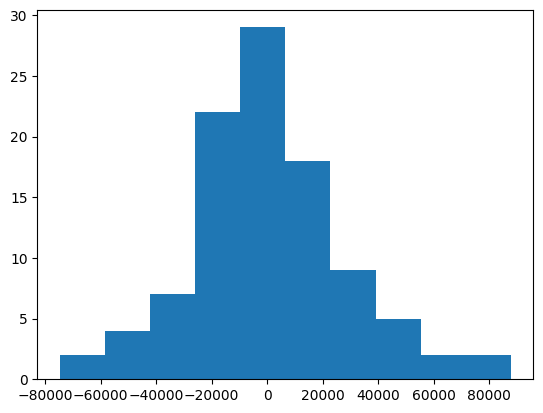

In [2197]:
plt.hist(
    Y - predictions
)  # plot the difference between the actual and predicted values. It should be normally distributed

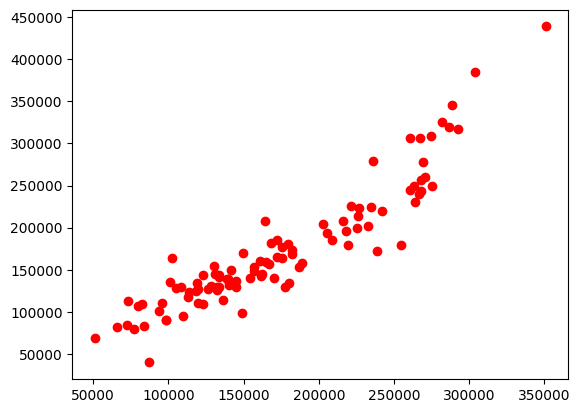

In [2198]:
plt.scatter(
    predictions, Y, color="r"
)  # scatter plot of the predictions against the actual values. It should be a straight line with a slope of 1

[Back to top](#Index)

### 3.4 Verify The Model Against Test Data

The score against the training data is 0.85, but against the new data in jtest.csv, it decreases to 0.75. 
Because jtest.csv has empty data in the GarageYrBlt column, I had to fill these with the mean of the whole column.

In [2199]:
# test the 4th model with test data

X = test[cols]
Y = test["SalePrice"]

X['GarageYrBlt'] = X['GarageYrBlt'].fillna(X['GarageYrBlt'].mean())
# see how good the model is
print(
    f"R^2 is : {model_4.score(X,Y)}"
)  # Without fillna (filling empty values of GarageYrBlt), this errors with Input X contains NaN.

R^2 is : 0.7546246844663147


C:\Users\andre\AppData\Local\Temp\ipykernel_5288\2298846239.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GarageYrBlt'] = X['GarageYrBlt'].fillna(X['GarageYrBlt'].mean())


[Back to top](#Index)

## Conclusion


The model that performed the best was the 4th model, the one with the top 10 correlated columns, 100 training records, and no null columns. The score for this model is 0.85, meaning given these 10 variables, the model can predict 85% of the sale price. This is better than the 0.75 of Dr. Williams. Since the scatter plot of prediction vs actual looks like it has a slope of 1, the model is a good predictor. Basically having more columns, and more training records, and removing null columns made the model more accurate. The variables I included are: 
- 'OverallQual', 
- 'GrLivArea', 
- 'GarageArea', 
- 'GarageCars',
- 'YearBuilt', 
- 'TotalBsmtSF', 
- 'GarageYrBlt', 
- 'FullBath', 
- 'MasVnrArea',
- 'TotRmsAbvGrd'

These variables make sense, since having a higher overall quality would seem to make the sale higher. Having a bigger living room area would also seem to make the sale higher, and so on.




[Back to top](#Index
)
## References

Made with the help of GitHub Copilot

“Pandas DataFrame corr() Method” Geeks for geeks. Last Updated : 01 Dec, 2023. [https://www.geeksforgeeks.org/python-pandas-dataframe-corr/](https://www.geeksforgeeks.org/python-pandas-dataframe-corr/).

